# Juan Simón Surez Alvarado #
# Predicción de enfermedad cardíaca con Regresión logística #


In [1]:
# Librerias necesarias 

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos 
import seaborn as sns # Creación de gráficos estadísticos 
import matplotlib.pyplot as plt # Creación de gráficos de dos dimensiones 

# Librerias para implementar ciencias de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

#
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Datos = pd.read_csv("heart_cleveland_upload.csv")

In [3]:
Datos.shape

(297, 14)

In [4]:
Datos.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
missing_values = Datos.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [7]:
Datos.shape

(297, 14)

**Se buscaron valores faltantes por columna, evidenciandose que a ninguna columna le faltan valores.**

# Identificación de valores atípicos #

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atípicos')

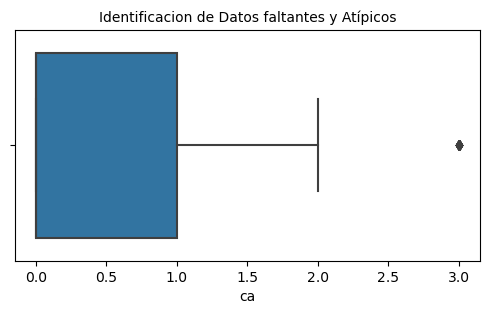

In [8]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificacion de Datos faltantes y Atípicos', fontsize=10)

**Un registro con 3 vasos coloreados por fluoroscopia se considera normal**

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atípicos')

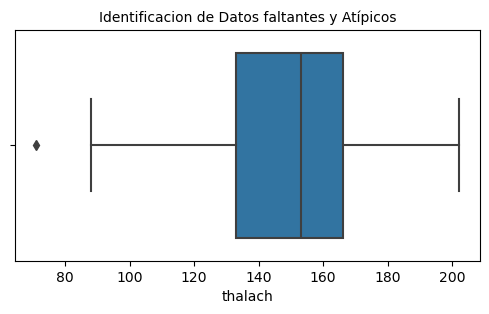

In [9]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificacion de Datos faltantes y Atípicos', fontsize=10)

**Un valor de talach (frecuencia cardíaca máxima) por debajo de 80 bpm puede ser normal para un deportista o debido a alguna condición médica.**

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atípicos')

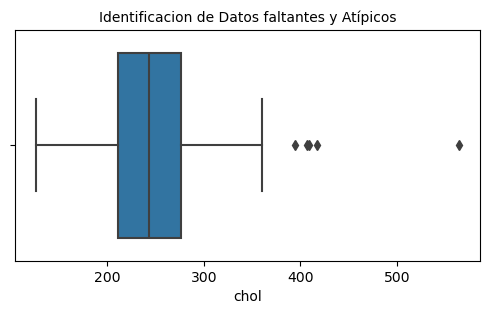

In [10]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificacion de Datos faltantes y Atípicos', fontsize=10)

**Aunque es posible que algunas personas tengan valores tan altos debido a condiciones médicas o genéticas, retirar estos datos extremos puede ayudar al modelo a ser más preciso en la predicción de casos de salud. Por este motivo más adelante se establecerá un límite y se eliminarán regitros atípicos**

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atípicos')

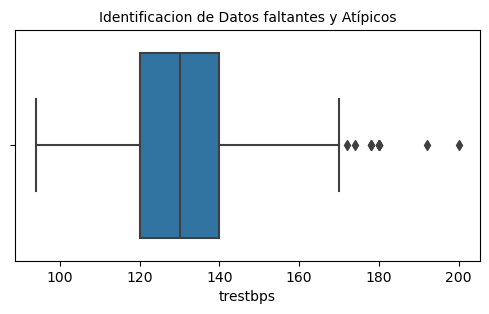

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificacion de Datos faltantes y Atípicos', fontsize=10)

**Una presión sanguínea en reposo superior a 170 es considerado peligroso y atípico, aunque se deben considerar casos existentes de hipertensión severa o situaciones médicas específicas que puedan justificar dicho valor. Más adelante se tomará en consideración si estos registros se tomarán en cuenta o no.**

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atípicos')

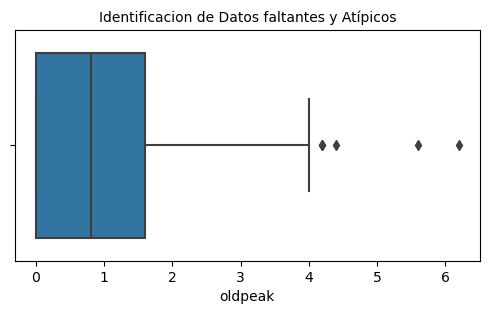

In [12]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificacion de Datos faltantes y Atípicos', fontsize=10)

**un registro de Oldpeak superior a 5 mm se considera atípico porque representa valores que están muy por encima de los rangos normales observados en la población general.**

# Conteo y eliminación de Datos atípicos #

In [16]:
# Conteo de valores Atípicos para la columna oldpeak
nivel_minimo=0
nivel_maximo=5
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [17]:
Datos.shape

(297, 14)

In [18]:
# Eliminación de los valores encontrados 
Datos = Datos[(Datos['oldpeak'] >= nivel_minimo) & (Datos['oldpeak'] <= nivel_maximo)]


In [19]:
Datos.shape

(295, 14)

**Al establecer un límite en 5 mm para los registros de Oldpeak, se busca mejorar la precisión y la generalización del modelo al enfocarse en valores más representativos y comunes en la población.**

In [22]:
# Conteo de valores Atípicos para la columna chol
nivel_minimo_chol = 0
nivel_maximo_chol = 400
Total_Atipicos_chol = ((Datos['chol'] < nivel_minimo_chol) | (Datos['chol'] > nivel_maximo_chol)).sum()
print("El total de datos atípicos en 'chol' es {}".format(Total_Atipicos_chol))

El total de datos atípicos en 'chol' es 4


In [23]:
# Eliminación de los valores encontrados 
Datos = Datos[(Datos['chol'] >= nivel_minimo_chol) & (Datos['chol'] <= nivel_maximo_chol)]

In [25]:
Datos.shape

(291, 14)

In [27]:
#Revisión del tipo de datos y datos faltantes 
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        291 non-null    int64  
 1   sex        291 non-null    int64  
 2   cp         291 non-null    int64  
 3   trestbps   291 non-null    int64  
 4   chol       291 non-null    int64  
 5   fbs        291 non-null    int64  
 6   restecg    291 non-null    int64  
 7   thalach    291 non-null    int64  
 8   exang      291 non-null    int64  
 9   oldpeak    291 non-null    float64
 10  slope      291 non-null    int64  
 11  ca         291 non-null    int64  
 12  thal       291 non-null    int64  
 13  condition  291 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.1 KB


# Selección de características mas relevantes para entrenar el modelo #

### Interpretación de la columna 'condition':

- **0**: Indica que el individuo no tiene una condición de enfermedad cardíaca.
- **1**: Indica que el individuo sí tiene una condición de enfermedad cardíaca.


In [28]:
# Total de personas con enfermedad cardíaca

Datos['condition'].value_counts()

condition
0    158
1    133
Name: count, dtype: int64

In [29]:
Datos[['condition']].head(15)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# Dividir el dataset en Train y Test para evaluar correctamente el modelo #

In [30]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [31]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
52    48    1   1       110   229    0        0      168      0      1.0   
131   48    1   2       124   255    1        0      175      0      0.0   
178   64    0   3       180   325    0        0      154      1      0.0   
199   60    1   3       145   282    0        2      142      1      2.8   
58    45    1   1       128   308    0        2      170      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
172   65    1   3       120   177    0        0      140      0      0.4   
167   66    0   3       178   228    1        0      165      1      1.0   
75    69    1   2       140   254    0        2      146      0      2.0   
236   56    1   3       125   249    1        2      144      1      1.2   
233   57    1   3       132   207    0        0      168      1      0.0   

     slope  ca  thal  
52       2   0     2  
131      0   2     0  
178      0   0    

In [34]:
print (Y_train)

52     1
131    0
178    0
199    1
58     0
      ..
172    0
167    1
75     1
236    1
233    0
Name: condition, Length: 218, dtype: int64


# Entrenar el modelo configurando los diferentes hiperparámetros #

In [35]:
# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [38]:
print (Y_test)

113    0
76     1
51     0
272    0
39     0
      ..
150    0
216    1
139    0
220    1
214    1
Name: condition, Length: 73, dtype: int64


In [37]:
print (Prediccion)

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1]


# Evaluar el desmpeño del modelo en el conjunto de Test con métricas como precisión, recall, F1- score, etc. #

In [39]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        40
           1       0.96      0.76      0.85        33

    accuracy                           0.88        73
   macro avg       0.90      0.87      0.87        73
weighted avg       0.89      0.88      0.87        73



# Gráficas que permitan visualizar los resultados del modelo #

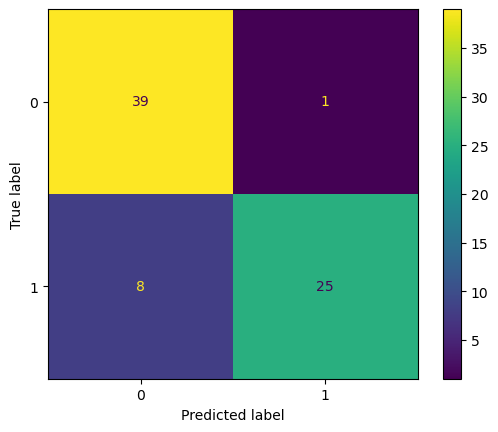

In [40]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**El gráfico muestra que el modelo acertó en la predicción de 39 pacientes enfermos y 25 pacientes no enfermos, pero falló en 8 casos donde no detectó la enfermedad cardíaca y en 1 caso donde predijo erróneamente que un paciente estaba enfermo.**

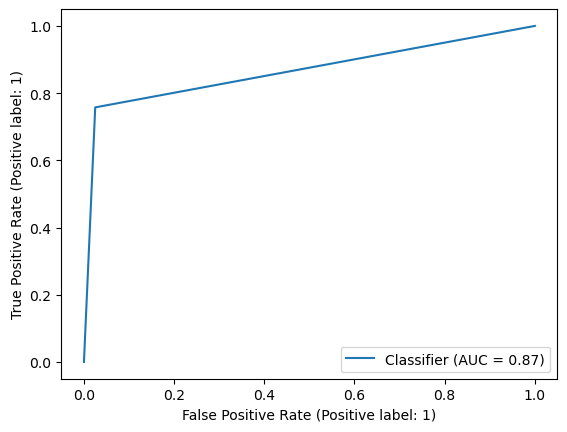

In [41]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

**En este caso específico, el área bajo la curva (AUC) del clasificador es de 0,87, lo que indica un buen rendimiento general. Un AUC de 1 representaría un clasificador perfecto, mientras que un AUC de 0,5 sería equivalente a una clasificación aleatoria.**

### Interpretación del Classification Report

El modelo muestra un **accuracy del 88%**, indicando que el 88% de las predicciones en el conjunto de datos de prueba son correctas, evidenciando un rendimiento generalmente sólido.

#### 0 (sin enfermedad cardiaca)
Destaca con una **precisión del 83%** y un **recall del 97%**. Esto sugiere que el modelo es efectivo en identificar y clasificar individuos sin enfermedad cardiaca. El **F1-score de 0.90** confirma un buen equilibrio entre precisión y recall para esta categoría.

#### 1 (con enfermedad cardiaca)
Exhibe una **precisión del 96%** y un **recall del 76%**. Aunque la precisión es alta, el recall más bajo indica una oportunidad de mejora en la identificación de individuos con enfermedad cardiaca. El **F1-score de 0.85** subraya una armonización adecuada entre precisión y recall para esta clasificación.

#### Métricas generales
- **Macro avg**: Las métricas promedio para todas las clases se sitúan en el rango de 0.87-0.90. A pesar de que las clases menos representadas pueden influir en estas métricas, el modelo mantiene un buen desempeño general.

- **Weighted avg**: Con métricas ponderadas por el número de muestras para cada clase entre el 87-89%, el modelo muestra un rendimiento equilibrado al considerar todas las categorías, incluso aquellas menos frecuentes.

### Conclusión

El modelo presenta un rendimiento robusto con un accuracy del 88%. Aunque existen áreas de mejora, como la identificación de individuos con enfermedad cardiaca, el modelo es eficaz en la predicción de las categorías más comunes. Considerando ajustes adicionales y técnicas para manejar el desequilibrio de clases, se podría optimizar aún más su rendimiento en las categorías menos representadas.
